In [28]:
import numpy as np
import sys
#np.set_printoptions(precision=5, linewidth=200, suppress=True)
import psi4
from helper_PFCI import PFHamiltonianGenerator
from helper_PFCI import Determinant
from helper_cqed_rhf import cqed_rhf
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', False)

In [29]:
# options for mgf
mol_str = """
Li
H 1 1.5
symmetry c1
"""

options_dict = {
    "basis": "6-311G**",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    "save_jk" : True
}


psi4.set_options(options_dict)
mol = psi4.geometry(mol_str)


In [64]:
mol_str = """
Li
H 1 1.8
symmetry c1
"""

options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}

cavity_dict = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.08]),
    'ci_level' : 'cas',
    'full_diagonalization' : True,
    'number_of_photons' : 5, 
    'nact_els' : 4,
    'nact_orbs' : 6
}

mol = psi4.geometry(mol_str)

psi4.set_options(options_dict)

test_pf = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    cavity_dict
)




Start SCF iterations:

Canonical RHF One-electron energy = -12.2195250859902877
CQED-RHF One-electron energy      = -12.1733154158923096
Nuclear repulsion energy          = 0.8819620177833333
Dipole energy                     = 0.0421384310023478
SCF Iteration   1: Energy = -7.8373228475698884   dE = -7.83732E+00   dRMS = 1.02011E-03
SCF Iteration   2: Energy = -7.8374285824130823   dE = -1.05735E-04   dRMS = 3.04339E-04
SCF Iteration   3: Energy = -7.8374408964616009   dE = -1.23140E-05   dRMS = 1.25366E-04
SCF Iteration   4: Energy = -7.8374429263562462   dE = -2.02989E-06   dRMS = 5.19700E-05
SCF Iteration   5: Energy = -7.8374432698071228   dE = -3.43451E-07   dRMS = 2.14489E-05
SCF Iteration   6: Energy = -7.8374433280603437   dE = -5.82532E-08   dRMS = 8.84029E-06
SCF Iteration   7: Energy = -7.8374433379461372   dE = -9.88579E-09   dRMS = 3.64247E-06
SCF Iteration   8: Energy = -7.8374433396241248   dE = -1.67799E-09   dRMS = 1.50074E-06
SCF Iteration   9: Energy = -7.837443339

In [65]:
print(test_pf.CIeigs[0])
#singlet_states = test_pf.sort_dipole_allowed_states( N_el)
#print(singlet_states)
#print(test_pf.CIeigs[3]-test_pf.CIeigs[0])

-7.864816010555133


In [66]:
mol_tmpl = """
Li
H 1 **R**
symmetry c1
"""

mol_str = """
Li
H 1 1.5
symmetry c1
"""

N_R = 50
N_el = 50
r_array = np.linspace(1.4, 2.2, N_R)

E_array = np.zeros((N_R, N_el))

r_idx = 0
for r in r_array:
    mol_str = mol_tmpl.replace("**R**", str(r))
    
    LiH = PFHamiltonianGenerator(mol_str, options_dict, cavity_dict)
    # sort out states with dipole-allowed transition from ground state
    #singlet_states = LiH.sort_dipole_allowed_states( N_el)
    E_array[r_idx, :] = LiH.CIeigs[:50]
    r_idx += 1




Start SCF iterations:

Canonical RHF One-electron energy = -12.6946346236295895
CQED-RHF One-electron energy      = -12.6597167819194976
Nuclear repulsion energy          = 1.1339511657214287
Dipole energy                     = 0.0330458156228901
SCF Iteration   1: Energy = -7.8506451949644980   dE = -7.85065E+00   dRMS = 8.20557E-04
SCF Iteration   2: Energy = -7.8506776282117077   dE = -3.24332E-05   dRMS = 1.06023E-04
SCF Iteration   3: Energy = -7.8506785657511173   dE = -9.37539E-07   dRMS = 3.02462E-05
SCF Iteration   4: Energy = -7.8506786784939511   dE = -1.12743E-07   dRMS = 1.28793E-05
SCF Iteration   5: Energy = -7.8506786987901744   dE = -2.02962E-08   dRMS = 5.59941E-06
SCF Iteration   6: Energy = -7.8506787025721785   dE = -3.78200E-09   dRMS = 2.42507E-06
SCF Iteration   7: Energy = -7.8506787032785983   dE = -7.06420E-10   dRMS = 1.04872E-06
SCF Iteration   8: Energy = -7.8506787034105638   dE = -1.31966E-10   dRMS = 4.53346E-07
SCF Iteration   9: Energy = -7.850678703

 Completed Hamiltonian build in 0.37727808952331543 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.6073028869779655
CQED-RHF One-electron energy      = -12.5707786075044723
Nuclear repulsion energy          = 1.0834129522073814
Dipole energy                     = 0.0343957098719667
SCF Iteration   1: Energy = -7.8526932866605899   dE = -7.85269E+00   dRMS = 8.18625E-04
SCF Iteration   2: Energy = -7.8527299862233653   dE = -3.66996E-05   dRMS = 1.28811E-04
SCF Iteration   3: Energy = -7.8527317208229759   dE = -1.73460E-06   dRMS = 4.52595E-05
SCF Iteration   4: Energy = -7.8527319774878821   dE = -2.56665E-07   dRMS = 1.94280E-05
SCF Iteration   5: Energy = -7.8527320237324387   dE = -4.62446E-08   dRMS = 8.35591E-06
SCF Iteration   6: Energy = -7.8527320321914500   dE = -8.45901E-09   dRMS = 3.58141E-06
SCF Iteration   7: Energy = -7.8527320337405309   dE = -1.54908E-09   dRMS = 1.53331E-06
SCF Iteration   8: Energy = -7.8527320340242452   dE = -2.83714E-10  

 Completed Hamiltonian build in 0.3646268844604492 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.5241587898228026
CQED-RHF One-electron energy      = -12.4859393858613110
Nuclear repulsion energy          = 1.0371873329132002
Dipole energy                     = 0.0357962323203586
SCF Iteration   1: Energy = -7.8526751241856800   dE = -7.85268E+00   dRMS = 8.30098E-04
SCF Iteration   2: Energy = -7.8527185990215429   dE = -4.34748E-05   dRMS = 1.57233E-04
SCF Iteration   3: Energy = -7.8527214893053081   dE = -2.89028E-06   dRMS = 6.04262E-05
SCF Iteration   4: Energy = -7.8527219494100002   dE = -4.60105E-07   dRMS = 2.58176E-05
SCF Iteration   5: Energy = -7.8527220314326520   dE = -8.20227E-08   dRMS = 1.09975E-05
SCF Iteration   6: Energy = -7.8527220461797764   dE = -1.47471E-08   dRMS = 4.67080E-06
SCF Iteration   7: Energy = -7.8527220488331757   dE = -2.65340E-09   dRMS = 1.98201E-06
SCF Iteration   8: Energy = -7.8527220493106462   dE = -4.77471E-10   

 Completed Hamiltonian build in 0.3615560531616211 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.4449088519790934
CQED-RHF One-electron energy      = -12.4049025971777986
Nuclear repulsion energy          = 0.9947448845075447
Dipole energy                     = 0.0372495720885881
SCF Iteration   1: Energy = -7.8509380893602936   dE = -7.85094E+00   dRMS = 8.55360E-04
SCF Iteration   2: Energy = -7.8509911494184097   dE = -5.30601E-05   dRMS = 1.89229E-04
SCF Iteration   3: Energy = -7.8509955863687386   dE = -4.43695E-06   dRMS = 7.57453E-05
SCF Iteration   4: Energy = -7.8509963128621214   dE = -7.26493E-07   dRMS = 3.21342E-05
SCF Iteration   5: Energy = -7.8509964407322306   dE = -1.27870E-07   dRMS = 1.35704E-05
SCF Iteration   6: Energy = -7.8509964633628835   dE = -2.26307E-08   dRMS = 5.71656E-06
SCF Iteration   7: Energy = -7.8509964673704298   dE = -4.00755E-09   dRMS = 2.40640E-06
SCF Iteration   8: Energy = -7.8509964680802087   dE = -7.09779E-10   

 Completed Hamiltonian build in 0.364285945892334 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.3692821733550495
CQED-RHF One-electron energy      = -12.3273945423795439
Nuclear repulsion energy          = 0.9556394345023342
Dipole energy                     = 0.0387569001328238
SCF Iteration   1: Energy = -7.8477694852814874   dE = -7.84777E+00   dRMS = 8.94333E-04
SCF Iteration   2: Energy = -7.8478353205091995   dE = -6.58352E-05   dRMS = 2.23837E-04
SCF Iteration   3: Energy = -7.8478417384054158   dE = -6.41790E-06   dRMS = 9.12906E-05
SCF Iteration   4: Energy = -7.8478427995573146   dE = -1.06115E-06   dRMS = 3.84395E-05
SCF Iteration   5: Energy = -7.8478429839286346   dE = -1.84371E-07   dRMS = 1.61057E-05
SCF Iteration   6: Energy = -7.8478430160882429   dE = -3.21596E-08   dRMS = 6.73397E-06
SCF Iteration   7: Energy = -7.8478430217007595   dE = -5.61252E-09   dRMS = 2.81394E-06
SCF Iteration   8: Energy = -7.8478430226804043   dE = -9.79645E-10   d

 Completed Hamiltonian build in 0.3630540370941162 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.2970344769079389
CQED-RHF One-electron energy      = -12.2531685582653047
Nuclear repulsion energy          = 0.9194923164124112
Dipole energy                     = 0.0403183303324515
SCF Iteration   1: Energy = -7.8434081587092841   dE = -7.84341E+00   dRMS = 9.46532E-04
SCF Iteration   2: Energy = -7.8434904125056679   dE = -8.22538E-05   dRMS = 2.60615E-04
SCF Iteration   3: Energy = -7.8434992973534747   dE = -8.88485E-06   dRMS = 1.07131E-04
SCF Iteration   4: Energy = -7.8435007679871855   dE = -1.47063E-06   dRMS = 4.47750E-05
SCF Iteration   5: Energy = -7.8435010202867357   dE = -2.52300E-07   dRMS = 1.86234E-05
SCF Iteration   6: Energy = -7.8435010637016500   dE = -4.34149E-08   dRMS = 7.73259E-06
SCF Iteration   7: Energy = -7.8435010711762256   dE = -7.47458E-09   dRMS = 3.20924E-06
SCF Iteration   8: Energy = -7.8435010724633152   dE = -1.28709E-09   

 Completed Hamiltonian build in 0.3628957271575928 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.2279483802846354
CQED-RHF One-electron energy      = -12.1820053684223826
Nuclear repulsion energy          = 0.8859800679782459
Dipole energy                     = 0.0419329479648184
SCF Iteration   1: Energy = -7.8380534196877418   dE = -7.83805E+00   dRMS = 1.01119E-03
SCF Iteration   2: Energy = -7.8381562594228109   dE = -1.02840E-04   dRMS = 2.99362E-04
SCF Iteration   3: Energy = -7.8381681556360574   dE = -1.18962E-05   dRMS = 1.23316E-04
SCF Iteration   4: Energy = -7.8381701179120293   dE = -1.96228E-06   dRMS = 5.11664E-05
SCF Iteration   5: Energy = -7.8381704504277154   dE = -3.32516E-07   dRMS = 2.11350E-05
SCF Iteration   6: Energy = -7.8381705069147136   dE = -5.64870E-08   dRMS = 8.71790E-06
SCF Iteration   7: Energy = -7.8381705165157838   dE = -9.60107E-09   dRMS = 3.59487E-06
SCF Iteration   8: Energy = -7.8381705181479893   dE = -1.63221E-09   

 Completed Hamiltonian build in 0.36292386054992676 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.1618316008527625
CQED-RHF One-electron energy      = -12.1137113095689415
Nuclear repulsion energy          = 0.8548247249284615
Dipole energy                     = 0.0435988618764368
SCF Iteration   1: Energy = -7.8318720271218627   dE = -7.83187E+00   dRMS = 1.08744E-03
SCF Iteration   2: Energy = -7.8320002155893427   dE = -1.28188E-04   dRMS = 3.39993E-04
SCF Iteration   3: Energy = -7.8320157317601442   dE = -1.55162E-05   dRMS = 1.39882E-04
SCF Iteration   4: Energy = -7.8320182756906611   dE = -2.54393E-06   dRMS = 5.76278E-05
SCF Iteration   5: Energy = -7.8320187015984164   dE = -4.25908E-07   dRMS = 2.36467E-05
SCF Iteration   6: Energy = -7.8320187730621758   dE = -7.14638E-08   dRMS = 9.69261E-06
SCF Iteration   7: Energy = -7.8320187850601748   dE = -1.19980E-08   dRMS = 3.97212E-06
SCF Iteration   8: Energy = -7.8320187870749525   dE = -2.01478E-09  

 Completed Hamiltonian build in 0.36052489280700684 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.0985141762878570
CQED-RHF One-electron energy      = -12.0481155389669965
Nuclear repulsion energy          = 0.8257860930837581
Dipole energy                     = 0.0453132521765289
SCF Iteration   1: Energy = -7.8250037595464903   dE = -7.82500E+00   dRMS = 1.17440E-03
SCF Iteration   2: Energy = -7.8251627323911617   dE = -1.58973E-04   dRMS = 3.82490E-04
SCF Iteration   3: Energy = -7.8251825470627452   dE = -1.98147E-05   dRMS = 1.56850E-04
SCF Iteration   4: Energy = -7.8251857709193864   dE = -3.22386E-06   dRMS = 6.41661E-05
SCF Iteration   5: Energy = -7.8251863042818517   dE = -5.33362E-07   dRMS = 2.61608E-05
SCF Iteration   6: Energy = -7.8251863927064846   dE = -8.84246E-08   dRMS = 1.06576E-05
SCF Iteration   7: Energy = -7.8251864073755115   dE = -1.46690E-08   dRMS = 4.34141E-06
SCF Iteration   8: Energy = -7.8251864098096071   dE = -2.43410E-09  

 Completed Hamiltonian build in 0.3623168468475342 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.0378453834023116
CQED-RHF One-electron energy      = -11.9850669207642468
Nuclear repulsion energy          = 0.7986555438243326
Dipole energy                     = 0.0470723997812994
SCF Iteration   1: Energy = -7.8175659282809802   dE = -7.81757E+00   dRMS = 1.27135E-03
SCF Iteration   2: Energy = -7.8177618830150104   dE = -1.95955E-04   dRMS = 4.26887E-04
SCF Iteration   3: Energy = -7.8177867513615480   dE = -2.48683E-05   dRMS = 1.74239E-04
SCF Iteration   4: Energy = -7.8177907621078289   dE = -4.01075E-06   dRMS = 7.07840E-05
SCF Iteration   5: Energy = -7.8177914178679933   dE = -6.55760E-07   dRMS = 2.86773E-05
SCF Iteration   6: Energy = -7.8177915253070838   dE = -1.07439E-07   dRMS = 1.16128E-05
SCF Iteration   7: Energy = -7.8177915429222304   dE = -1.76151E-08   dRMS = 4.70265E-06
SCF Iteration   8: Energy = -7.8177915458111196   dE = -2.88889E-09   

 Completed Hamiltonian build in 0.36196184158325195 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -11.9796907659129843
CQED-RHF One-electron energy      = -11.9244310111432021
Nuclear repulsion energy          = 0.7732509937225647
Dipole energy                     = 0.0488716966267364
SCF Iteration   1: Energy = -7.8096570858513310   dE = -7.80966E+00   dRMS = 1.37771E-03
SCF Iteration   2: Energy = -7.8098970876872684   dE = -2.40002E-04   dRMS = 4.73270E-04
SCF Iteration   3: Energy = -7.8099278498597950   dE = -3.07622E-05   dRMS = 1.92062E-04
SCF Iteration   4: Energy = -7.8099327636935332   dE = -4.91383E-06   dRMS = 7.74823E-05
SCF Iteration   5: Energy = -7.8099335576761124   dE = -7.93983E-07   dRMS = 3.11955E-05
SCF Iteration   6: Energy = -7.8099336862432569   dE = -1.28567E-07   dRMS = 1.25576E-05
SCF Iteration   7: Energy = -7.8099337070780095   dE = -2.08348E-08   dRMS = 5.05552E-06
SCF Iteration   8: Energy = -7.8099337104553985   dE = -3.37739E-09  

 Completed Hamiltonian build in 0.3602733612060547 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -11.9239294911210880
CQED-RHF One-electron energy      = -11.8660873672210201
Nuclear repulsion energy          = 0.7494128127985549
Dipole energy                     = 0.0507056448085512
SCF Iteration   1: Energy = -7.8013601129126577   dE = -7.80136E+00   dRMS = 1.49314E-03
SCF Iteration   2: Energy = -7.8016522211330113   dE = -2.92108E-04   dRMS = 5.21772E-04
SCF Iteration   3: Energy = -7.8016898127495278   dE = -3.75916E-05   dRMS = 2.10336E-04
SCF Iteration   4: Energy = -7.8016957557725668   dE = -5.94302E-06   dRMS = 8.42612E-05
SCF Iteration   5: Energy = -7.8016967046941339   dE = -9.48922E-07   dRMS = 3.37140E-05
SCF Iteration   6: Energy = -7.8016968565538782   dE = -1.51860E-07   dRMS = 1.34908E-05
SCF Iteration   7: Energy = -7.8016968808775857   dE = -2.43237E-08   dRMS = 5.39950E-06
SCF Iteration   8: Energy = -7.8016968847748807   dE = -3.89729E-09   

 Completed Hamiltonian build in 0.36312079429626465 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -11.8704521229909687
CQED-RHF One-electron energy      = -11.8099272693345458
Nuclear repulsion energy          = 0.7270004669952337
Dipole energy                     = 0.0525678587687484
SCF Iteration   1: Energy = -7.7927448174747997   dE = -7.79274E+00   dRMS = 1.61745E-03
SCF Iteration   2: Energy = -7.7930982334692231   dE = -3.53416E-04   dRMS = 5.72576E-04
SCF Iteration   3: Energy = -7.7931436983450535   dE = -4.54649E-05   dRMS = 2.29076E-04
SCF Iteration   4: Energy = -7.7931508073000408   dE = -7.10895E-06   dRMS = 9.11207E-05
SCF Iteration   5: Energy = -7.7931519287764939   dE = -1.12148E-06   dRMS = 3.62311E-05
SCF Iteration   6: Energy = -7.7931521061337108   dE = -1.77357E-07   dRMS = 1.44115E-05
SCF Iteration   7: Energy = -7.7931521342086505   dE = -2.80749E-08   dRMS = 5.73398E-06
SCF Iteration   8: Energy = -7.7931521386544489   dE = -4.44580E-09  

In [67]:
from matplotlib import pyplot as plt

safe_1 = np.copy(E_array[:,1])
safe_2 = np.copy(E_array[:,2])

E_array[:,1] = np.copy(safe_1)
E_array[:,2] = np.copy(safe_2)

In [68]:
#E_array[:,1] = np.copy(safe_1)
#E_array[:,2] = np.copy(safe_2)

#nop1 = E_array[10,1]
#lup1 = E_array[10,2]

nop = np.copy(E_array[:21,1])
lup = np.copy(E_array[:21,2])
#E_array[10,2] = nop1
#E_array[10,1] = lup1

E_array[:21,2] = np.copy(nop)
E_array[:21,1] = np.copy(lup)

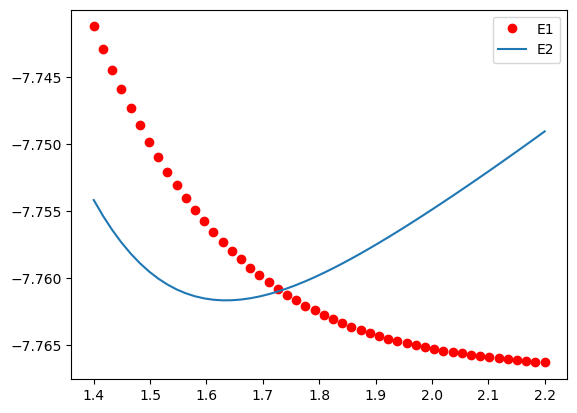

In [69]:
#print(r_array)
#print(E_array[:,1]-E_array[:,0])

#plt.plot(r_array, E_array[:,0]+0.12086, label="E0")
plt.plot(r_array, E_array[:,1], 'ro', label="E1")
plt.plot(r_array, E_array[:,2], label="E2")
#plt.plot(r_array, E_array[:,3], label="E3")
#plt.plot(r_array, E_array[:,4], label="E4")
plt.legend()
#plt.xlim(1.79, 1.81)
plt.show()

In [70]:
for i in range(N_R):
    print(F'{r_array[i]}, {E_array[i,0]}, {E_array[i,1]}, {E_array[i,2]}, {E_array[i,3]}, {E_array[i,3]} ')
          

1.4, -7.869500852449356, -7.741258647374209, -7.754179122618237, -7.719394753226141, -7.719394753226141 
1.4163265306122448, -7.8704392170769015, -7.742912970939123, -7.755353296305497, -7.720716152059627, -7.720716152059627 
1.4326530612244897, -7.871241132381267, -7.744471281386011, -7.75640270741195, -7.721924891202185, -7.721924891202185 
1.4489795918367345, -7.87191337269409, -7.745938624278867, -7.757334669643316, -7.723025383934806, -7.723025383934806 
1.4653061224489796, -7.872462387950941, -7.747319772341245, -7.758156189735845, -7.7240217506981255, -7.7240217506981255 
1.4816326530612245, -7.872894323176195, -7.748619243918263, -7.758873983910739, -7.724917840749417, -7.724917840749417 
1.4979591836734694, -7.873215036506797, -7.749841319962314, -7.7594944922508615, -7.7257172529426645, -7.7257172529426645 
1.5142857142857142, -7.873430115877463, -7.750990059659243, -7.760023891074935, -7.726423355796021, -7.726423355796021 
1.530612244897959, -7.873544894482352, -7.752069314

In [ ]:
# we will compare to this!
#PF_2020 = np.copy(PF_EIG)
#PF_22 = np.copy(PF_EIG)

print(MAE(PF_5020[:,0], PF_2020[:,0]))
print(MAE(PF_5020[:,1], PF_2020[:,1]))
print(MAE(PF_5020[:,2], PF_2020[:,2]))

print(MAE(PF_5050[:,0], PF_2020[:,0]))
print(MAE(PF_5050[:,1], PF_2020[:,1]))
print(MAE(PF_5050[:,2], PF_2020[:,2]))

print(MAE(PF_5050[:,0], PF_5020[:,0]))
print(MAE(PF_5050[:,1], PF_5020[:,1]))
print(MAE(PF_5050[:,2], PF_5020[:,2]))
#omega_cav = 0.120000
#lambda_vector = np.array([0, 0.0, 0.05])
#numpy.savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)[source]
np.savetxt('PF_5050_om_zp12_lamz_zp05.out', PF_5050, fmt='%16.12e', delimiter=',', newline='\n', header="N_el = 50, N_ph = 50, omega = 0.12, lambda = 0., 0., 0.05, r_array = np.linspace(1.4, 2.2, N_R)" ) 


In [ ]:
for i in range(20):

    for j in range(20):
        N_el = N_el_array[i]
        N_ph = N_ph_array[j]
        print(F'{N_el}, {N_ph}, {MAE_array[i, j, 0]}, {MAE_array[i, j, 1]}, {MAE_array[i, j, 2]}')
        
    print('')


In [ ]:
#plt.plot(r_array, PF_2020[:,0], 'black', label="LP - 20-20")
#plt.plot(r_array, PF_WTRIP[:,0], 'ro', label="LP - 2-2")
plt.plot(r_array, PF_2020[:,1], 'r--', label="LP - 20-2")
plt.plot(r_array, PF_WTRIP[:,2], 'purple', label="UP - 20-20")
plt.plot(r_array, PF_2020[:,2], 'b--', label="UP - 20-2")
plt.plot(r_array, PF_WTRIP[:,3], 'bo', label="UP - 2-2")
plt.legend()
plt.show()


plt.plot(r_array,PF_2020[:,2]- PF_WTRIP[:,3])
#plt.xlim(1.62, 2.2)
plt.show()

print(PF_2020[:,2]- PF_WTRIP[:,3])

In [ ]:
plt.plot(r_array, PF_2020[:,1], 'black', label="LP - 20-20")
plt.plot(r_array, PF_22[:,1], 'ro', label="LP - 2-2")
plt.plot(r_array, PF_202[:,1], 'r--', label="LP - 20-2")
plt.plot(r_array, PF_2020[:,2], 'purple', label="UP - 20-20")
plt.plot(r_array, PF_202[:,2], 'b--', label="UP - 20-2")
plt.plot(r_array, PF_22[:,2], 'bo', label="UP - 2-2")
plt.legend()
plt.show()

#plt.plot(r_array, PF_EIG[:,2], 'b--')
#plt.plot(r_array, E_array[:,0]+omega_cav)
#plt.plot(r_array, E_array[:,2])
#plt.plot(r_array, E_array[:,3])
#plt.plot(r_array, PF_EIG[:,3])
#plt.plot(r_array, PF_EIG[:,4])
#plt.plot(r_array, PF_EIG[:,5])





In [ ]:

mol_str = """
Li
H 1 1.8
symmetry c1
"""

options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    "save_jk" : True
}

cavity_dict = {
    'omega_value' : 0.0,
    'lambda_vector' : np.array([0, 0, 0]),
    'ci_level' : 'fci',
    'full_diagonalization' : True,
    'number_of_photons' : 0
}



E_r_1p8_array = np.zeros(N_el)
Mu_r_1p8_array = np.zeros((N_el, N_el, 3))



mol = psi4.geometry(mol_str)
scf_e, wfn = psi4.energy('SCF', return_wfn=True)
fci_energy = psi4.energy('fci',ref_wfn=wfn)

LiH = PFHamiltonianGenerator(mol_str, options_dict, cavity_dict)
assert np.isclose(fci_energy, LiH.CIeigs[0], 1e-7)
# sort out states with dipole-allowed transition from ground state
singlet_states = LiH.sort_dipole_allowed_states( N_el)
E_r_1p8_array[:] = LiH.CIeigs[singlet_states]
Mu_r_1p8_array = LiH.compute_dipole_moments(singlet_states)
    



In [ ]:
lam_z = np.linspace(0, 0.1, 50)
pol_v_l = np.zeros((50,3))
print(lam_z)

In [ ]:
N_el = 20
N_ph = 20
for i in range(50):
    lambda_vector[2] = lam_z[i]           
    _HPF = build_pf_hamiltonian(N_el, N_ph, E_array[k,:], omega_cav, lambda_vector, Mu_array[k, :, :, :])
    pf_e, pf_c = np.linalg.eigh(_HPF)
    pol_v_l[i,:] = pf_e[:3]
    print(lam_z[i], pf_e[0], pf_e[1], pf_e[2])

In [ ]:
plt.plot(lam_z, pol_v_l[:,0], label='g')
plt.plot(lam_z, pol_v_l[:,1], label='LP')
plt.plot(lam_z, pol_v_l[:,2], label='UP')

plt.legend()
plt.show()